# Exercise 3

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [2]:
target = housing.target

In [3]:
features = housing.data[["Longitude", "Latitude"]]

In [4]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [5]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

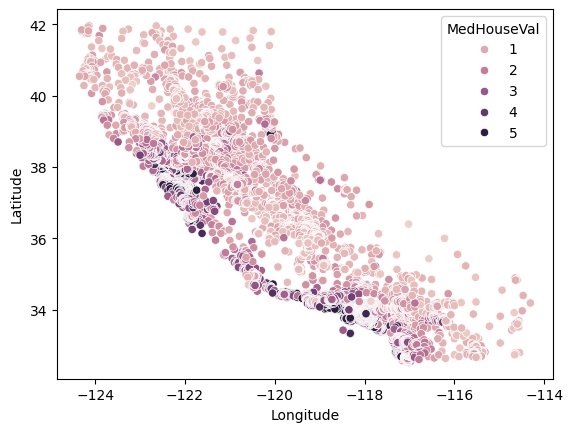

In [6]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [7]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-7-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-7-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [9]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

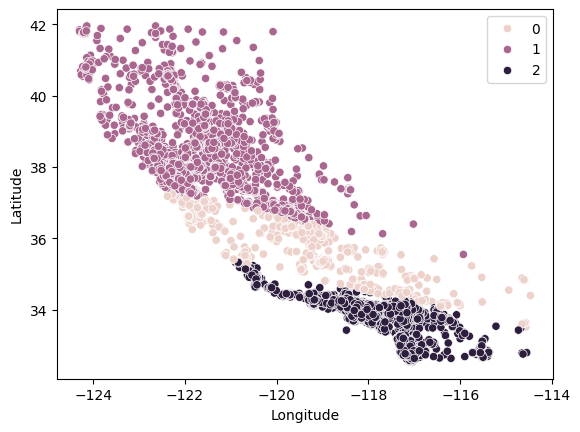

In [11]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

SSE for 1 clusters: 2.0690172605159725
SSE for 2 clusters: 0.9919086994399962
SSE for 3 clusters: 0.2896400340092231
SSE for 4 clusters: 0.132747199063285
SSE for 5 clusters: 0.08993069099852923
SSE for 6 clusters: 0.08088391268087425
SSE for 7 clusters: 0.04567092271514459
SSE for 8 clusters: 0.04238498302613978
SSE for 9 clusters: 0.03416843504376616
SSE for 10 clusters: 0.022092331374449697


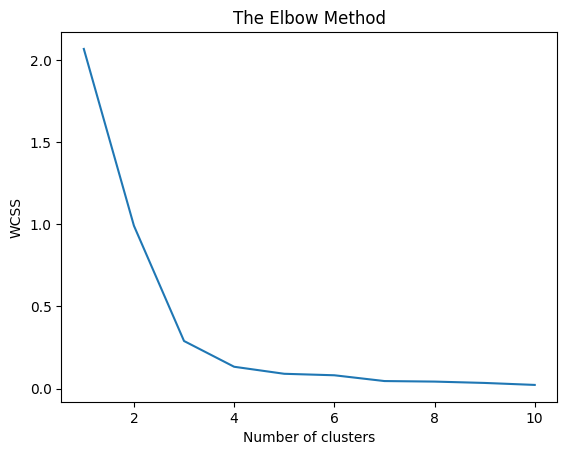

In [26]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse_per_cluster = kmeans.inertia_
    print(f"SSE for {i} clusters: {sse_per_cluster}")

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score (Train): 0.7953524892052838
Silhouette Score (Test): 0.8006705973779372


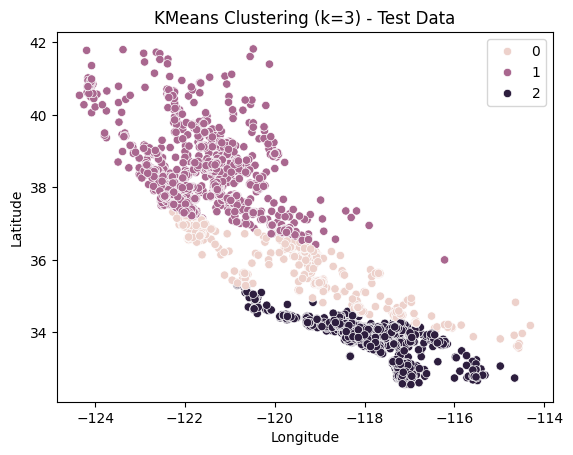

In [28]:
best_k = 3

kmeans_best = KMeans(n_clusters=best_k, random_state=0, n_init='auto')
kmeans_best.fit(X_train_norm)


from sklearn.metrics import silhouette_score

labels_train = kmeans_best.labels_
silhouette_avg_train = silhouette_score(X_train_norm, labels_train)
print(f"Silhouette Score (Train): {silhouette_avg_train}")


labels_test = kmeans_best.predict(X_test_norm)
silhouette_avg_test = silhouette_score(X_test_norm, labels_test)
print(f"Silhouette Score (Test): {silhouette_avg_test}")

sns.scatterplot(data=X_test, x='Longitude', y='Latitude', hue=labels_test)
plt.title(f"KMeans Clustering (k={best_k}) - Test Data")
plt.show()